### Plot the slice

In [ ]:
import pickle
import anndata
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# transparent background
plt.rcParams.update({
    "figure.facecolor":  (0.0, 0.0, 0.0, 0.0),  
    "axes.facecolor":    (0.0, 0.0, 0.0, 0.0),  
})

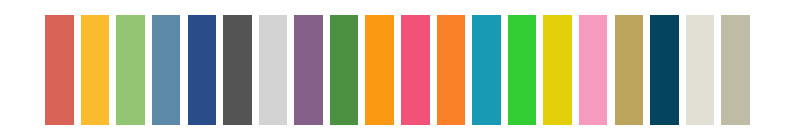

In [2]:
# define colors
purple = '#856088'
pink = '#F25278'
red = '#d96256'
lightgreen = '#93c572'
darkgreen = '#4c9141'
lightblue = '#5d8aa8'
darkblue = '#284d88'
white = '#fafafa'
lightgray = '#d3d3d3'
darkgray ='#545454'
lightorange = '#fabc2e'
darkorange = '#fb9912'
lightyellow = '#e4d00a'
lightgreen2 = '#32CD32'
lightblue2 = '#189AB4'
darkblue2 = '#05445E'
lightpink = '#F79AC0'
darkorange2 = '#FA8128'
darkyellow = '#BDA55D'
lightgray2 = '#E2E0D4'
lightgray3 = '#BFBBA4'

colors = [
    red, lightorange, lightgreen, lightblue, darkblue, 
    darkgray, lightgray, purple, darkgreen, darkorange,
    pink, darkorange2, lightblue2, lightgreen2, lightyellow,
    lightpink, darkyellow, darkblue2, lightgray2, lightgray3
]

plt.figure(figsize=(10, 1.5))
plt.bar(range(len(colors)), height=1, color=colors)
__ = plt.axis('off')

#### load data

In [5]:
# expr
path = '../processed_data/decoded_spots/mouse2_coronal/spots_220501_wb3_co2_15_5z18R_merfish5.csv'
expr_df = pd.read_csv(path)
expr_df.head()

,barcode_id,global_x,global_y,global_z,x,y,fov,target_gene
0,0,5357.7505,-818.14777,0.0,422.57350,105.15802,0,Grp
1,0,5372.3877,-814.76746,0.0,556.86210,136.17009,0,Grp
2,0,5368.3354,-812.59436,0.0,519.68180,156.10689,0,Grp
3,0,5367.2110,-807.90784,0.0,509.36734,199.10252,0,Grp
4,0,5361.4580,-806.18085,0.0,456.58624,214.94606,0,Grp


In [12]:
# seg
path = '../processed_data/cell_boundaries/mouse2_coronal/220501_wb3_co2_15_5z18R_merfish5.csv'
seg_df = pd.read_csv(path)

In [15]:
# gene by cell mat
path = '../processed_data/counts_mouse2_coronal.h5ad'
counts = anndata.read_h5ad(path)

path = '../processed_data/raw_counts_mouse2_coronal.h5ad'
raw_counts = anndata.read_h5ad(path)

#### plot

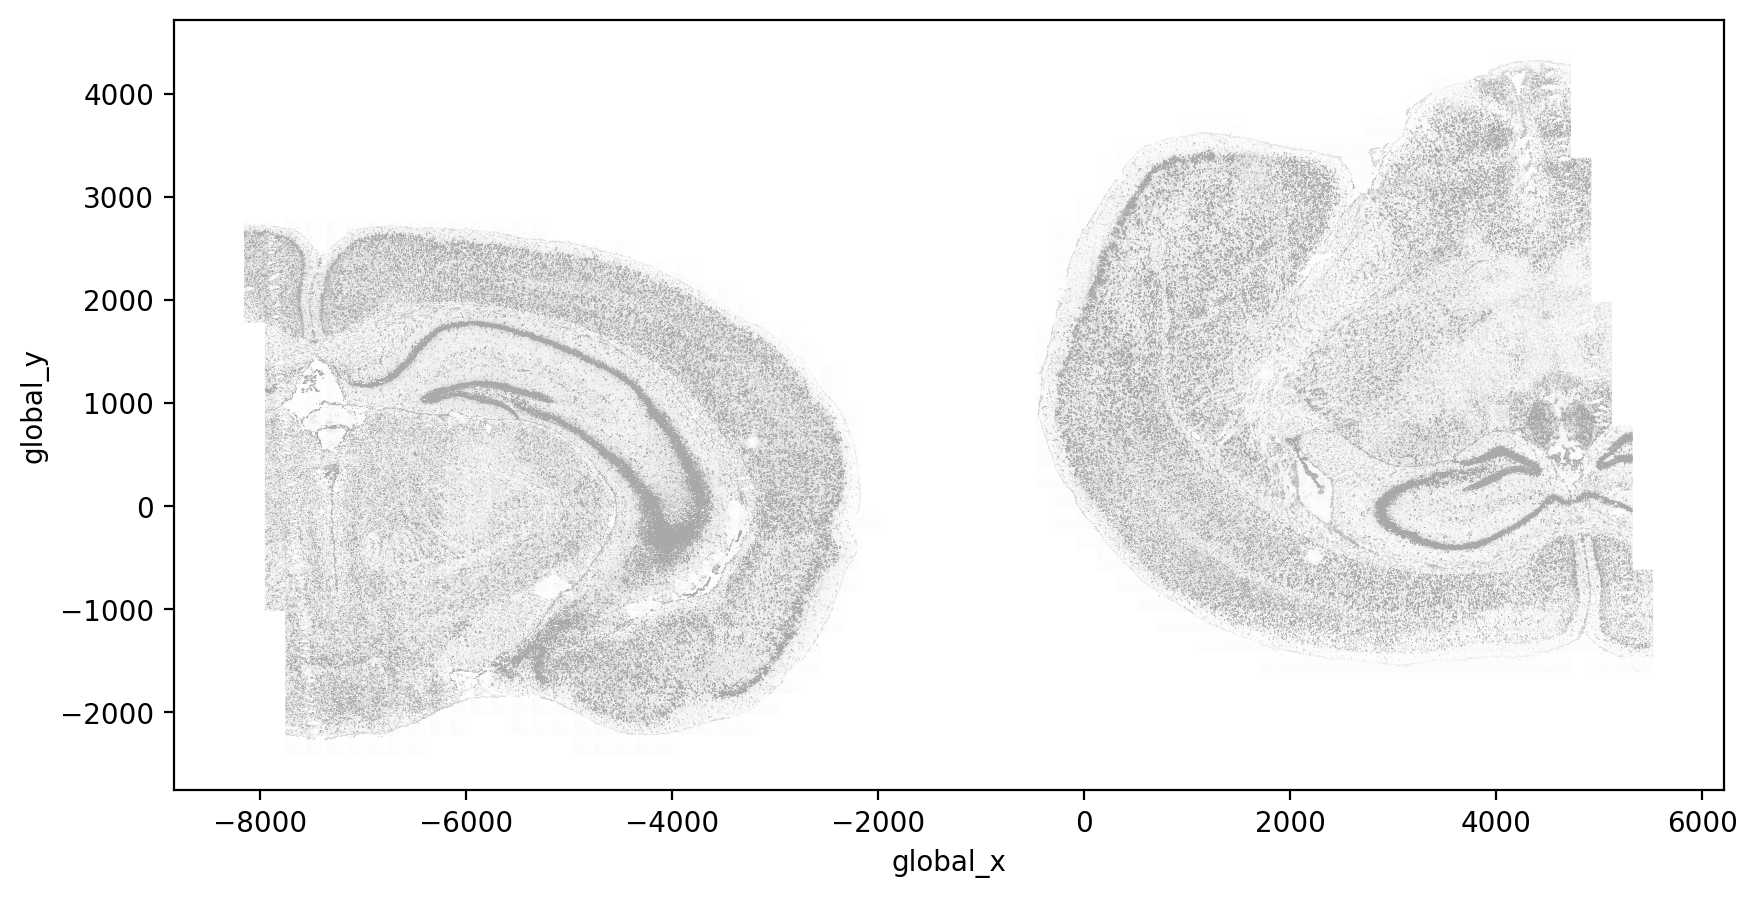

In [10]:
# all expr
nr = 1
nc = 1
ss_nr = 10
ss_nc = 10
fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=200)
gs = fig.add_gridspec(nr,nc,
                      width_ratios=[1]*nc,
                      height_ratios=[1]*nr)
gs.update(wspace=0.0, hspace=0.0)

ax = plt.subplot(gs[0,0])
ax.scatter(expr_df.global_x[:], expr_df.global_y[:], 
           marker='.', 
           edgecolor='none',
           s=0.5, 
           color=darkgray, alpha=0.01)
ax.set_xlabel('global_x')
ax.set_ylabel('global_y')
ax.set_aspect('equal', adjustable='box')

# plt.savefig(f'figs/slice_expr.png', dpi=300, bbox_inches='tight')

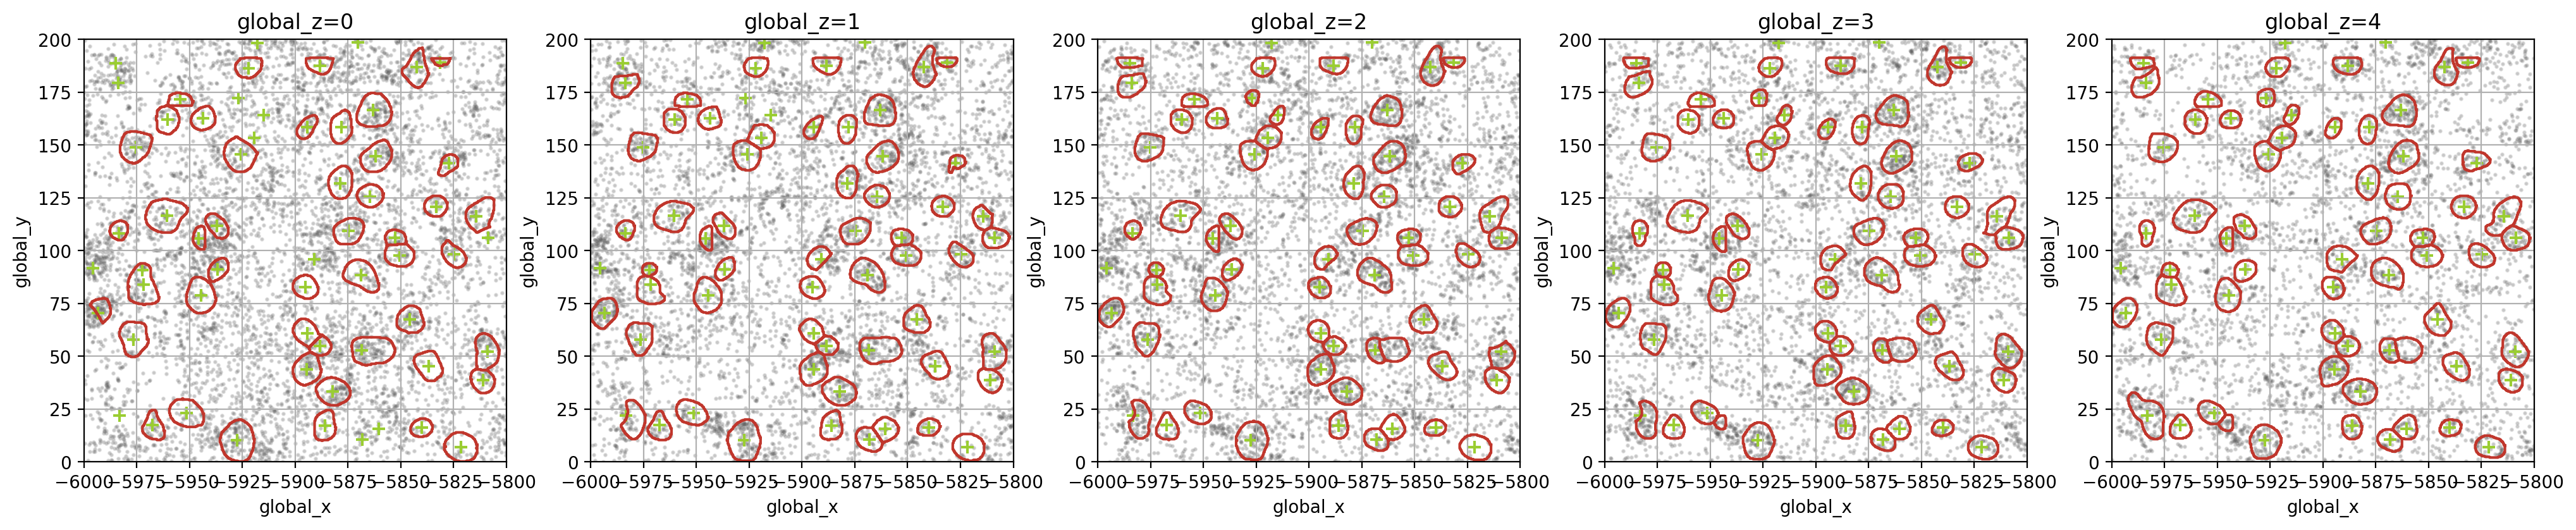

In [26]:
# zoom in, separate z panels
Z=5
N = seg_df['Unnamed: 0'].nunique()
plot_xmin = -3000
plot_ymin = 0
plot_d_x = 200
plot_d_y = 200

plot_expr_df = expr_df[(expr_df.global_x > plot_xmin)
                      &(expr_df.global_y > plot_ymin)
                      &(expr_df.global_x < (plot_xmin+plot_d_x))
                      &(expr_df.global_y < (plot_ymin+plot_d_y))]

plot_centroid = (counts.obs)[(counts.obs.sample_id=='co2_sample15')
                            &(counts.obs.center_x>plot_xmin)
                            &(counts.obs.center_y>plot_ymin)
                            &(counts.obs.center_x<(plot_xmin+plot_d_x))
                            &(counts.obs.center_y<(plot_ymin+plot_d_y))]

nr = 1
nc = Z
ss_nr = 5
ss_nc = 5
fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=200)
gs = fig.add_gridspec(nr,nc,
                      width_ratios=[1]*nc,
                      height_ratios=[1]*nr)
gs.update(wspace=0.2, hspace=0.0)

for z in range(Z):
    ax = plt.subplot(gs[0,z])
    
    # expr
    plot_expr_df_z = plot_expr_df[plot_expr_df.global_z==z]
    ax.scatter(plot_expr_df_z.global_x,
               plot_expr_df_z.global_y,
               s=2, 
               color=darkgray,
               alpha=0.2)
    ax.set_xlim([plot_xmin, plot_xmin+plot_d_x])
    ax.set_ylim([plot_ymin, plot_ymin+plot_d_y])
    ax.set_xlabel('global_x')
    ax.set_ylabel('global_y')
    ax.set_title('global_z='+str(z))
    ax.grid()
    ax.set_aspect('equal', adjustable='box') 
    
    # seg
    for ic in range(N):
        cb_x_str = seg_df['boundaryX_z'+str(z)].iloc[ic]
        cb_y_str = seg_df['boundaryY_z'+str(z)].iloc[ic]
        if isinstance(cb_x_str, str) or isinstance(cb_y_str, str):
            cb_x = np.fromstring(cb_x_str, sep=',')
            cb_y = np.fromstring(cb_y_str, sep=',')
            if np.min(cb_x)>(plot_xmin) and np.max(cb_x)<(plot_xmin+plot_d_x) and np.min(cb_y)>(plot_ymin) and np.max(cb_y)<(plot_ymin+plot_d_y):
                ax.plot(cb_x, cb_y, color=red)

    # centroid
    ax.scatter(plot_centroid.center_x, plot_centroid.center_y, 
               marker='+',
               s = 50,
               color=lightgreen)

In [27]:
# marker genes
marker_EX = ['Rprm', 'Myl4', 'Rorb', 'Cux2', 'Lamp5', 'Slc17a7']
marker_IN = ['Reln', 'Pvalb', 'Gad2']
marker_Astr = ['Sox9', 'Aqp4', 'Gfap', 'Mfge8', 'Agt']
marker_Oligo = ['Sox10']

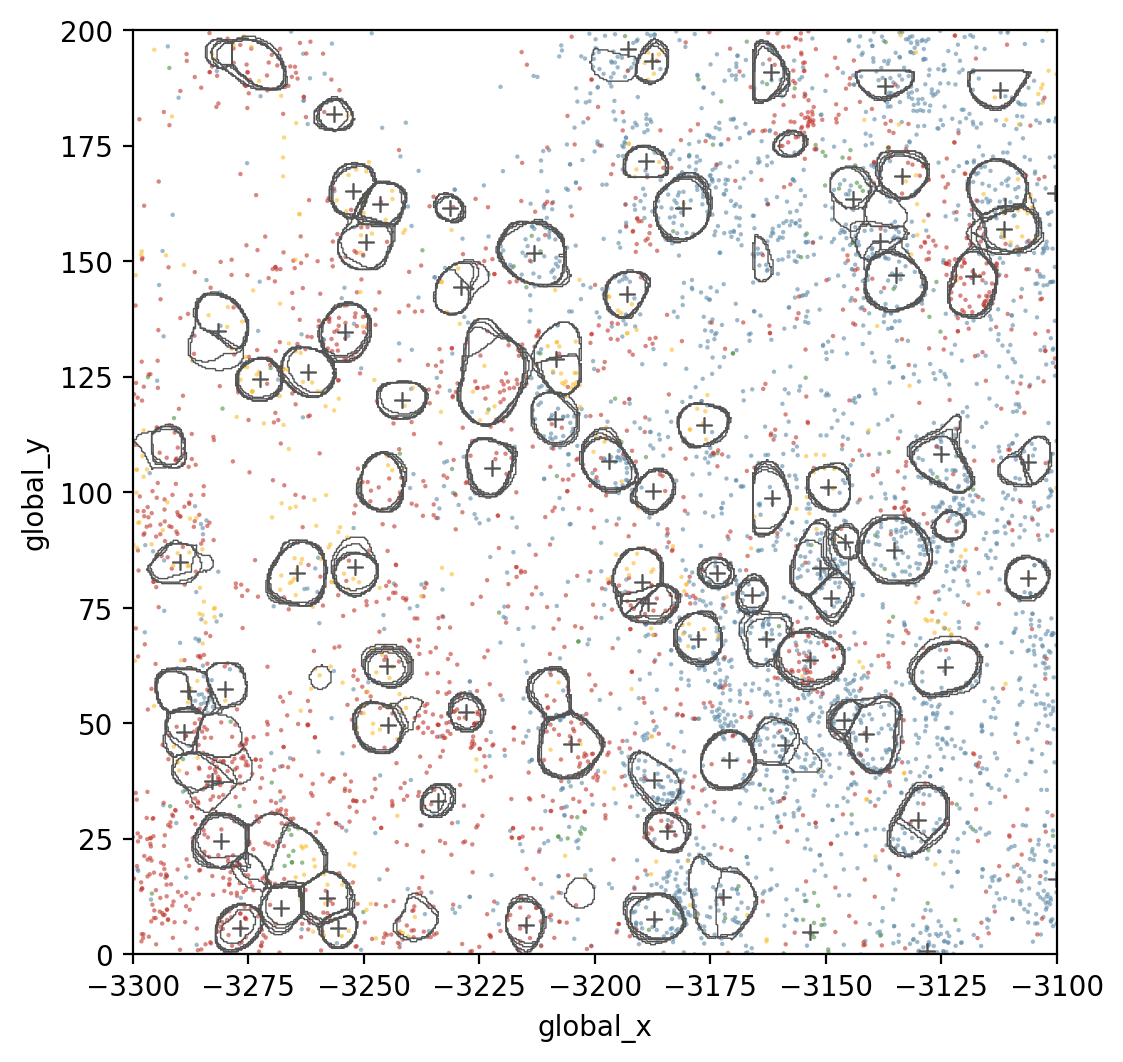

In [40]:
# zoom in, overlay z panels
Z=5
colors=[darkgray]*Z
N = seg_df['Unnamed: 0'].nunique()
plot_xmin = -3300
plot_ymin = 0
plot_d_x = 200
plot_d_y = 200

plot_expr_df = expr_df[(expr_df.global_x > plot_xmin)
                      &(expr_df.global_y > plot_ymin)
                      &(expr_df.global_x < (plot_xmin+plot_d_x))
                      &(expr_df.global_y < (plot_ymin+plot_d_y))]

plot_centroid = (counts.obs)[(counts.obs.sample_id=='co2_sample15')
                            &(counts.obs.center_x>plot_xmin)
                            &(counts.obs.center_y>plot_ymin)
                            &(counts.obs.center_x<(plot_xmin+plot_d_x))
                            &(counts.obs.center_y<(plot_ymin+plot_d_y))]

nr = 1
nc = 1
ss_nr = 6
ss_nc = 6
fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=200)
gs = fig.add_gridspec(nr,nc,
                      width_ratios=[1]*nc,
                      height_ratios=[1]*nr)
gs.update(wspace=0.0, hspace=0.0)
ax = plt.subplot(gs[0,0])

# expr
# EX
gl = marker_EX
plot_expr_df_gl = plot_expr_df[plot_expr_df.target_gene.isin(gl)]
ax.scatter(plot_expr_df_gl.global_x,
           plot_expr_df_gl.global_y,
           marker='.', edgecolor='none', s=10, 
           color=lightblue,
           alpha=0.6)
# IN
gl = marker_IN
plot_expr_df_gl = plot_expr_df[plot_expr_df.target_gene.isin(gl)]
ax.scatter(plot_expr_df_gl.global_x,
           plot_expr_df_gl.global_y,
           marker='.', edgecolor='none', s=10, 
           color=darkgreen,
           alpha=0.6)
# Astr
gl = marker_Astr
plot_expr_df_gl = plot_expr_df[plot_expr_df.target_gene.isin(gl)]
ax.scatter(plot_expr_df_gl.global_x,
           plot_expr_df_gl.global_y,
           marker='.', edgecolor='none', s=10, 
           color=red,
           alpha=0.6)
# Oligo
gl = marker_Oligo
plot_expr_df_gl = plot_expr_df[plot_expr_df.target_gene.isin(gl)]
ax.scatter(plot_expr_df_gl.global_x,
           plot_expr_df_gl.global_y,
           marker='.', edgecolor='none', s=10, 
           color=lightorange,
           alpha=0.6)

ax.set_xlim([plot_xmin, plot_xmin+plot_d_x])
ax.set_ylim([plot_ymin, plot_ymin+plot_d_y])
ax.set_xlabel('global_x')
ax.set_ylabel('global_y')

for z in range(Z):
    # seg
    for ic in range(N):
        cb_x_str = seg_df['boundaryX_z'+str(z)].iloc[ic]
        cb_y_str = seg_df['boundaryY_z'+str(z)].iloc[ic]
        if isinstance(cb_x_str, str) or isinstance(cb_y_str, str):
            cb_x = np.fromstring(cb_x_str, sep=',')
            cb_y = np.fromstring(cb_y_str, sep=',')
            if np.min(cb_x)>(plot_xmin) and np.max(cb_x)<(plot_xmin+plot_d_x) and np.min(cb_y)>(plot_ymin) and np.max(cb_y)<(plot_ymin+plot_d_y):
                ax.plot(cb_x, cb_y, lw=0.5, color=colors[z])

    # centroid
    ax.scatter(plot_centroid.center_x, plot_centroid.center_y, 
               marker='+',
               linewidth=0.5,
               s = 30,
               color=darkgray)
    
ax.set_aspect('equal', adjustable='box') 

# plt.savefig(f'figs/slice_zoomin.png', dpi=300, bbox_inches='tight')